## Life Expectancy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("./datasets/Life Expectancy Data.csv")

In [3]:
df.shape

(2938, 22)

**Context**

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

**Content**

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

**Acknowledgements**

The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

**Inspiration**

The data-set aims to answer the following key questions:

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3. How does Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have lower life expectancy?
8. What is the impact of Immunization coverage on life Expectancy?


* `Country:` The country to which the data belongs.
* `Year:` The year in which the data was collected.
* `Status:` Whether the country is classified as "Developing" or "Developed".
* `Life expectancy (men):` The average life expectancy of men in that country for that year.
* `Life expectancy (women):` The average life expectancy of women in that country for that year.
* `Adult Mortality (men):` The mortality rate amongst adult men in that country for that year.
* `Adult Mortality (women):` The mortality rate amongst adult women in that country for that year.
* `Infant deaths:` The number of infant deaths in that country for that year.
* `Alcohol:` Per capita alcohol consumption (in litres of pure alcohol) in that country for that year.
* `Percentage expenditure:` Expenditure on health as a percentage of Gross Domestic Product per capita(%).
* `Hepatitis B (men):` Hepatitis B vaccination coverage in men (%).
* `Hepatitis B (women):` Hepatitis B vaccination coverage in women (%).
* `Measles:` Number of reported cases of measles in that country for that year.
* `BMI:` Average Body Mass Index of the country's population.
* `Under-five deaths:` Number of deaths under five years old.
* `Polio:` Polio (Pol3) immunization coverage among 1-year-olds (%). The percentage of one-year-olds who have received three doses of polio containing vaccine in a given year.
* `Total expenditure:` General government expenditure on health as a percentage of total government expenditure (%).
* `Diphtheria:` Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%).
* `HIV/AIDS:` Deaths per 1 000 live births HIV/AIDS (0-4 years).
* `GDP:` Gross Domestic Product per capita (in USD).
* `Population:` Population of the country.
* `thinness 1-19 years:` Prevalence of thinness among children and adolescents for Age 10 to 19 (%). Percentage of defined population with a body mass index (BMI) less than 2 standard deviations below the median, according to the WHO references for school-age children and adolescents.
* `thinness 5-9 years:` Prevalence of thinness among children for Age 5 to 9(%). Percentage of defined population with a body mass index (BMI) less than 2 standard deviations below the median, according to the WHO references for school-age children and adolescents.
* `Income composition of resources:` Human Development Index in terms of income composition of resources (index ranging from 0 to 1).
* `Schooling:` Number of years of Schooling(years).

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.columns = [x.strip() for x in df.columns]

In [7]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df_short = df[["Country", "Year","Life expectancy","GDP", "Alcohol", "Schooling", "Population", "Polio"]].copy()

In [10]:
df_short.head()

,Country,Year,Life expectancy,GDP,Alcohol,Schooling,Population,Polio
0,Afghanistan,2015,65.0,584.259210,0.01,10.1,33736494.0,6.0
1,Afghanistan,2014,59.9,612.696514,0.01,10.0,327582.0,58.0
2,Afghanistan,2013,59.9,631.744976,0.01,9.9,31731688.0,62.0
3,Afghanistan,2012,59.5,669.959000,0.01,9.8,3696958.0,67.0
4,Afghanistan,2011,59.2,63.537231,0.01,9.5,2978599.0,68.0


In [11]:
def plot_hist(data, xlabel, ax):
    
    ax.hist(data, label=xlabel)
    ax.set_xlabel(xlabel)
    ax.legend()
    
def plot_scatter(x,y,xlabel,ylabel,ax):
    ax.scatter(x, y)

    ax.set_ylabel(xlabel)
    ax.set_xlabel(ylabel)


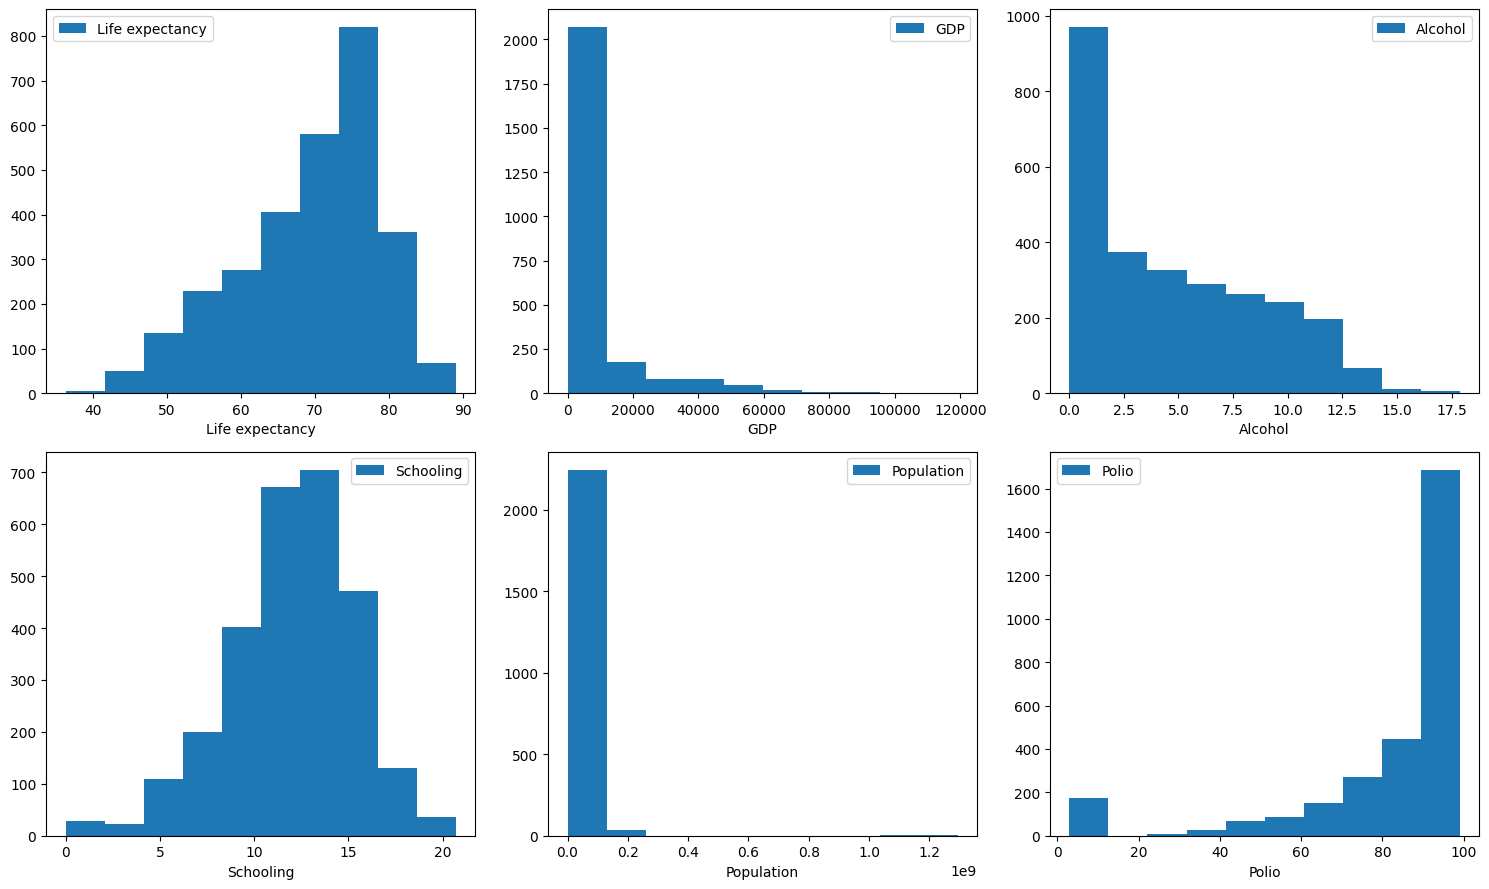

In [12]:
fig, axes = plt.subplots(figsize=(15, 9), nrows=2, ncols=3, tight_layout=True)

axes = axes.flatten()
columns = df_short.columns[2:]
for ax, col in zip(axes, columns):
    plot_hist(df_short[col], col, ax)
plt.show()

In [13]:
axes

array([<Axes: xlabel='Life expectancy'>, <Axes: xlabel='GDP'>,
       <Axes: xlabel='Alcohol'>, <Axes: xlabel='Schooling'>,
       <Axes: xlabel='Population'>, <Axes: xlabel='Polio'>], dtype=object)

In [14]:
axess = axes.flatten()

In [15]:
df_short.describe()

,Year,Life expectancy,GDP,Alcohol,Schooling,Population,Polio
count,2938.000000,2928.000000,2490.000000,2744.000000,2775.000000,2.286000e+03,2919.000000
mean,2007.518720,69.224932,7483.158469,4.602861,11.992793,1.275338e+07,82.550188
std,4.613841,9.523867,14270.169342,4.052413,3.358920,6.101210e+07,23.428046
min,2000.000000,36.300000,1.681350,0.010000,0.000000,3.400000e+01,3.000000
25%,2004.000000,63.100000,463.935626,0.877500,10.100000,1.957932e+05,78.000000
50%,2008.000000,72.100000,1766.947595,3.755000,12.300000,1.386542e+06,93.000000
75%,2012.000000,75.700000,5910.806335,7.702500,14.300000,7.420359e+06,97.000000
max,2015.000000,89.000000,119172.741800,17.870000,20.700000,1.293859e+09,99.000000


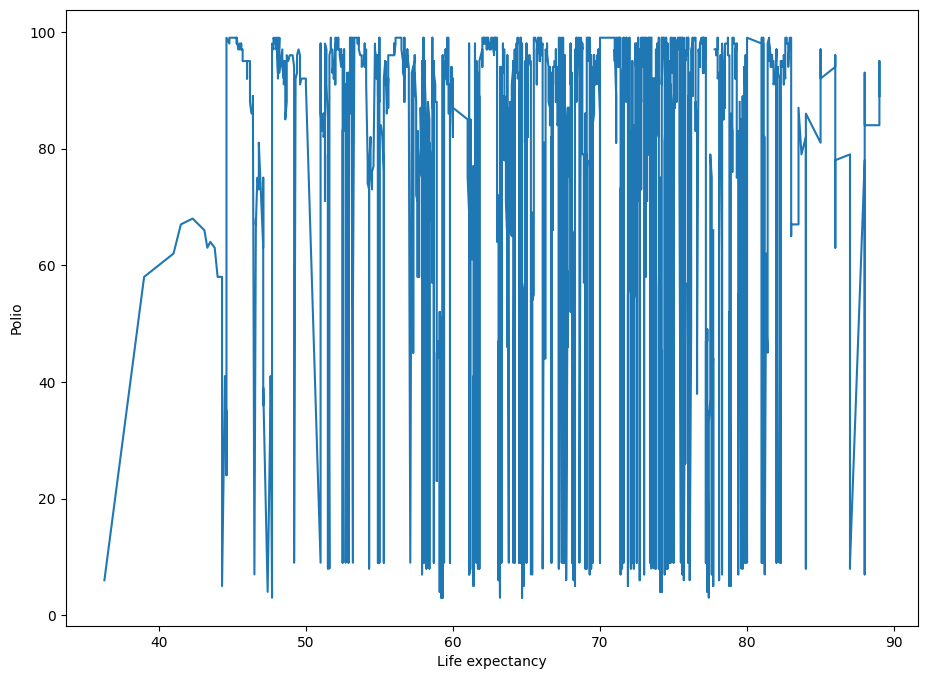

In [16]:
fig, axes = plt.subplots(figsize = (11,8))

df_short.sort_values("Life expectancy", inplace=True)
axes.plot(df_short['Life expectancy'], df.Polio)

axes.set_xlabel("Life expectancy")
axes.set_ylabel("Polio")

plt.show()

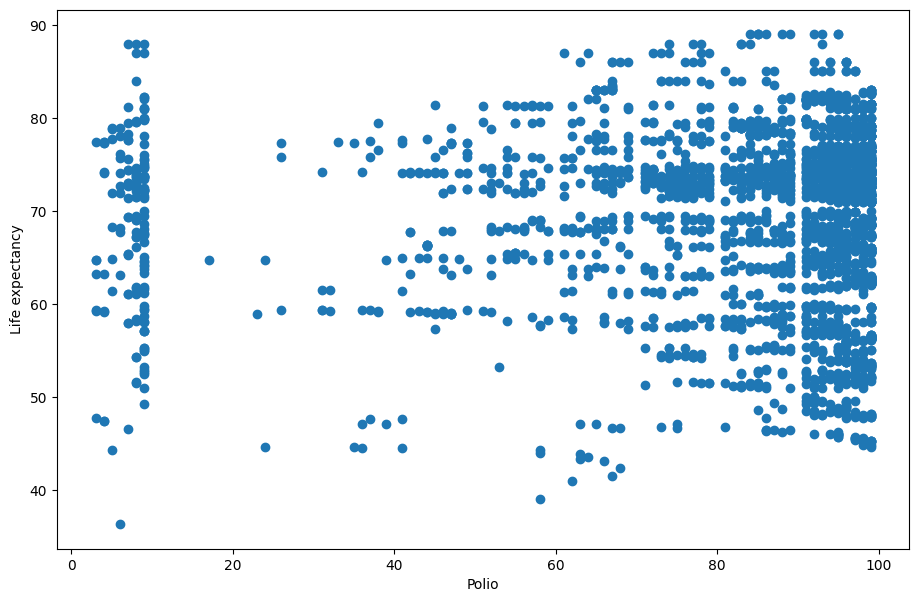

In [17]:
fig, axes = plt.subplots(figsize = (11,7))

df_short.sort_values("Life expectancy", inplace=True)
axes.scatter(df.Polio, df_short['Life expectancy'])

axes.set_ylabel("Life expectancy")
axes.set_xlabel("Polio")

plt.show()

In [18]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [19]:
df.Polio.describe()

count    2919.000000
mean       82.550188
std        23.428046
min         3.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64

In [20]:
df_short.head()

,Country,Year,Life expectancy,GDP,Alcohol,Schooling,Population,Polio
1127,Haiti,2010,36.3,662.279518,5.76,8.6,9999617.0,66.0
2312,Sierra Leone,2000,39.0,139.314773,3.97,6.7,4564297.0,46.0
2311,Sierra Leone,2001,41.0,227.779471,4.21,7.0,4739147.0,38.0
2309,Sierra Leone,2003,41.5,263.761831,4.07,7.4,5199549.0,66.0
2308,Sierra Leone,2004,42.3,263.145817,3.99,7.6,5439695.0,69.0


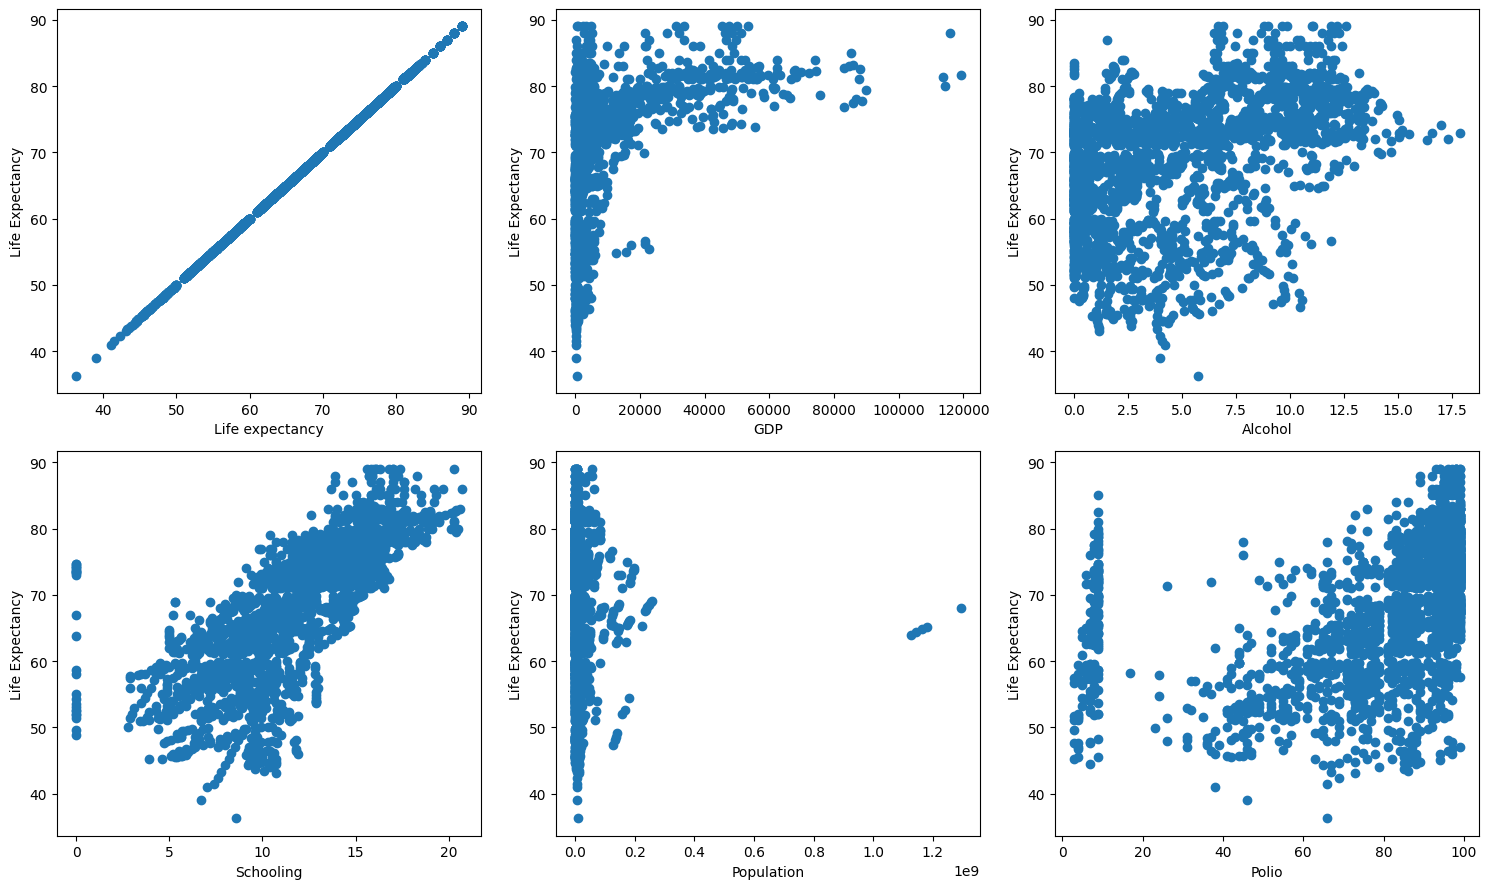

In [21]:
fig, axes = plt.subplots(figsize=(15, 9), nrows=2, ncols=3, tight_layout=True)

axes = axes.flatten()
columns = df_short.columns[2:]
for ax, col in zip(axes, columns):
    plot_scatter(df_short[col], df_short["Life expectancy"], "Life Expectancy", col, ax)
plt.show()

In [22]:
corr_data =  df_short[df_short.columns[2:]].corr()

In [23]:
corr_data

,Life expectancy,GDP,Alcohol,Schooling,Population,Polio
Life expectancy,1.000000,0.461455,0.404877,0.751975,-0.021538,0.465556
GDP,0.461455,1.000000,0.354712,0.448273,-0.028270,0.211976
Alcohol,0.404877,0.354712,1.000000,0.547378,-0.035252,0.221734
Schooling,0.751975,0.448273,0.547378,1.000000,-0.031668,0.417866
Population,-0.021538,-0.028270,-0.035252,-0.031668,1.000000,-0.038540
Polio,0.465556,0.211976,0.221734,0.417866,-0.038540,1.000000


<Axes: >

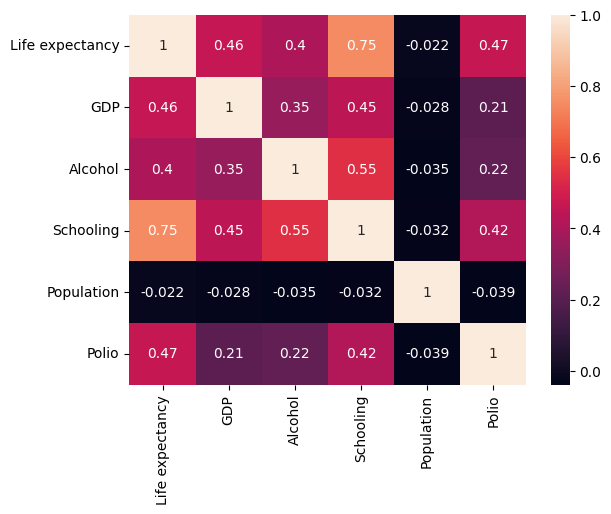

In [24]:
sns.heatmap(corr_data, annot=True)

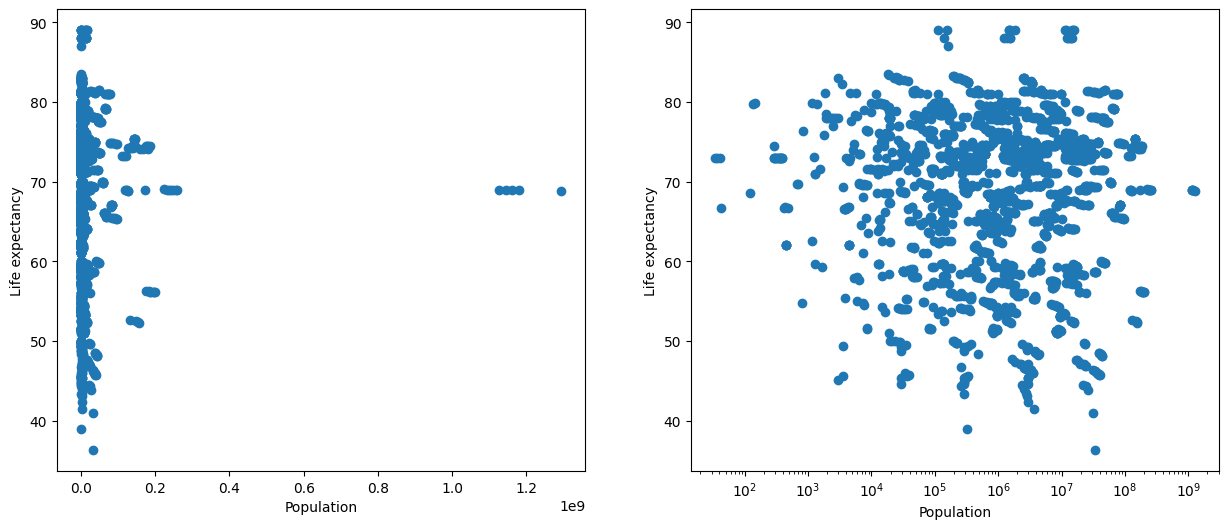

In [25]:
fig, (axes1, axes2) = plt.subplots(figsize = (15,6), ncols=2)

df_short.sort_values("Life expectancy", inplace=True)
axes1.scatter(df.Population, df_short['Life expectancy'])
axes2.scatter(df.Population, df_short['Life expectancy'])

axes1.set_ylabel("Life expectancy")
axes1.set_xlabel("Population")
axes2.set_ylabel("Life expectancy")
axes2.set_xlabel("Population")

axes2.set_xscale("log")

plt.show()

In [26]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
